## Jeremy Kazimer
### 5018-1732,
### Assignment #5

---

#### _Import Statements_

As always, our import statements:

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import tensorflow.compat.v2 as tf

import numpy as np

from matplotlib import pyplot as plt

#### _Solution_

Admittedly, this problem is weird.  I cannot do this on the Pi Zero W, nor my own installation of Python.  So, I must use Google Colab.  I actually enjoy it, after getting used to it.

However, another issue persists and this is that I don't really understanding the mathematics going on here.  I do understanding that the distribution we're looking at here is really the superposition of two normal distributions, so I started there:

In [6]:
tfd = tfp.distributions

'''
cat -> probability of either distribution
components -> the distributions in the mixture
loc -> mean of distribution
scale -> standard deviation of distribution
'''

cum_dist = tfd.Mixture(
  cat=tfd.Categorical(probs=[1.0, 1.0]),
  components=[
    tfd.Normal(loc=0., scale=1.0),
    tfd.Normal(loc=6., scale=0.5),
])

My main issue was finding a way to concate the two distributions.  Of course, normal addition doesn't work here, so I had to dive a bit deeper into the `tfp` notation.  Eventually, I found the mixture class.  This basically combines multiple distributions, as long as you give it the probability that this occurs.  This is the `tfd.Categorical(probs=[1.0, 1.0])` part.  I assumed that we were fine with both equally occuring.  I understand the example here has different amplitudes, but that seemed to be addressed normally.  For example, we can plot the distribution of this function:

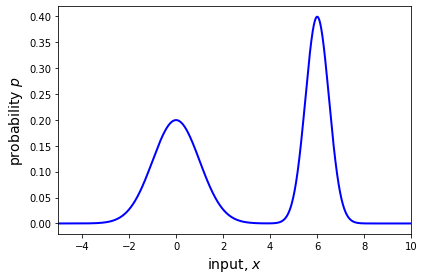

In [5]:
fig, ax = plt.subplots(1, 1)

x = tf.linspace(-5, 10, 1000)

ax.plot(x, [cum_dist.prob(float(i)) for i in x], lw = 2, c = 'blue')
ax.set_xlim(x[0], x[-1])

ax.set_ylabel('probability $p$', fontsize = 14)
ax.set_xlabel('input, $x$', fontsize = 14)

fig.tight_layout()

Regardless, we can now use this to simulate a random walk as follows:

In [8]:
'''
  num_results -> number of steps
  current_state -> starting probability
  kernel -> the probabilities of the distribution
  num_burnin_steps -> how many steps to wait before running the simulation
  trace_fn -> no idea, honestly.
'''

samples = tfp.mcmc.sample_chain(
  num_results=1000,
  current_state=tf.constant(1.0),
  kernel=tfp.mcmc.RandomWalkMetropolis(cum_dist.log_prob),
  num_burnin_steps=0,
  trace_fn=None)

And, of course, a plot:

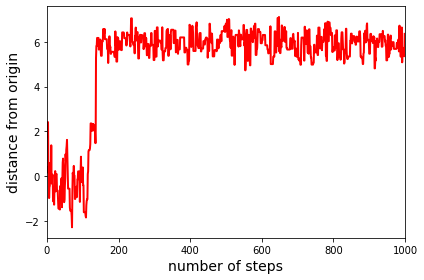

In [12]:
fig, ax = plt.subplots(1, 1)

ax.plot(tf.range(1000), samples, c = 'red', lw = 2)

ax.set_xlim(0, 1000)

ax.set_ylabel('distance from origin', fontsize = 14)
ax.set_xlabel('number of steps', fontsize = 14)

fig.tight_layout();

Note that this is only for one walker.  We can repeat this for several walkers:

In [15]:
more_samples = np.zeros((10, 1000))

for i in range(more_samples.shape[0]):

  more_samples[i] = tfp.mcmc.sample_chain(
    num_results=1000,
    current_state=tf.constant(1.0),
    kernel=tfp.mcmc.RandomWalkMetropolis(cum_dist.log_prob),
    num_burnin_steps=0,
    trace_fn=None)

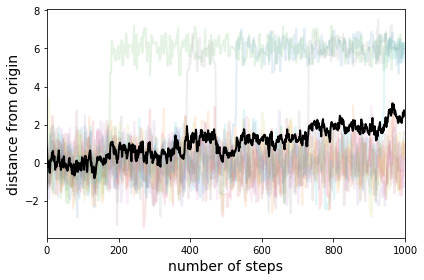

In [22]:
fig, ax = plt.subplots(1, 1)

ax.plot(tf.range(1000), more_samples.T, lw = 2, alpha = 0.125)
ax.plot(tf.range(1000), more_samples.mean(axis = 0), c = 'k', lw = 2)

ax.set_xlim(0, 1000)

ax.set_ylabel('distance from origin', fontsize = 14)
ax.set_xlabel('number of steps', fontsize = 14)

fig.tight_layout();

It doesn't quite look like that of the demonstration, but it's close.  I don't know what's wrong with my code such that it isn't precisely like it, but I'm sure it's something minor.  If I had more time, I would definitely look into it, but figuring out `tfp` was the main headache, not a major one, of this assignment.  Overall, interesting to see things streamlined like this, but I still prefer my `numpy` for most things!


---